# AP Statistics
## Test 2 -- THP

In [35]:
# load libraries
library(mosaic)
library(lattice)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Loading required package: mosaicData
Loading required package: Matrix

The 'mosaic' package masks several functions from core packages in order to add additional features.  
The original behavior of these functions should not be affected by this.

Attaching package: ‘mosaic’

The following object is masked from ‘package:Matrix’:

    mean

The following objects are masked from ‘package:dplyr’:

    count, do, tally

The following objects are masked from ‘package:stats’:

    binom.test, cor, cov, D, fivenum, IQR, median, prop.test, quantile,
    sd, t.test, var

The following objects are masked from ‘package:base’:

    max, mean, min, prod, range, sample, sum



In [36]:
# load data sets
one <- data.frame(x=c(2.2, 8.4, 3.6, 7.8, 1.2, 4.6, 5.1, 3, .4, 1.7),
                  y=c(15.2, 847.6, 66.8, 678.9, 2.6, 140.5, 190.2, 37.8, .092, 7.1))
two <- data.frame(x=c(1.6, 2.5, 7.6, 5.6, 1.9, 8.2, 3.3, 10.6, .8, 5.4),
                  y=c(-.3, -2, -13.15, -8.8, -.69, -14.44, -3.74, -19.8, 1.8, -8.17))
three <- data.frame(x=c(.47, 3.1, 2.6, 1.5, 3.5, 1.8, .4, 1.2, 2.7, .64),
                    y=c(1.05, 3.1, 2.5, 1.6, 3.6, 1.8, 1.01, 1.42, 2.6, 1.13))

### a.

### i. $y$ vs. $x$

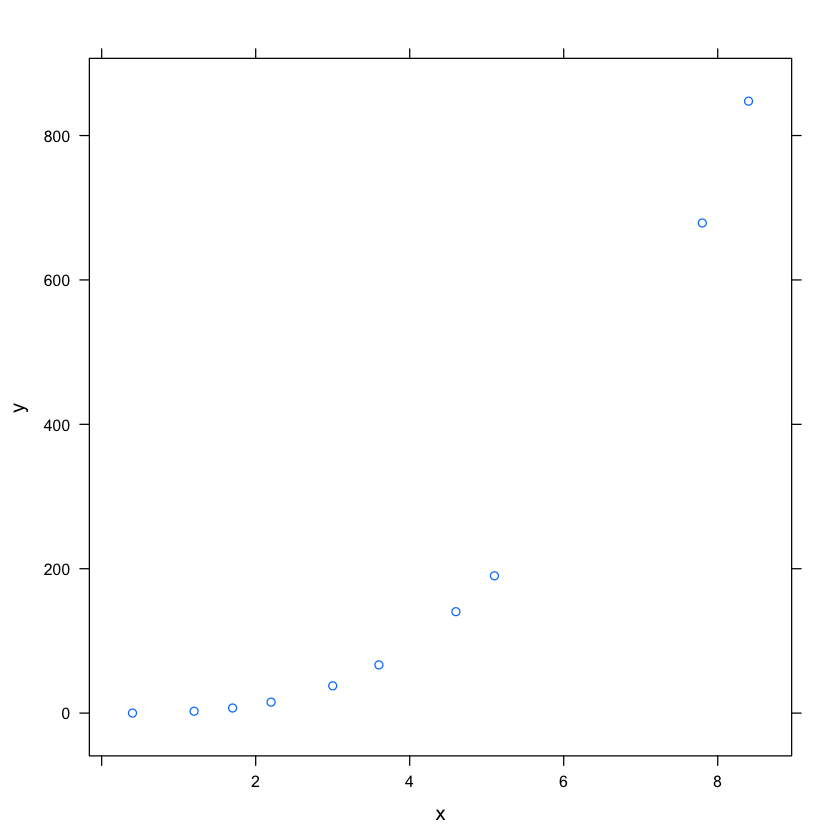

In [37]:
xyplot(y ~ x, data=one)

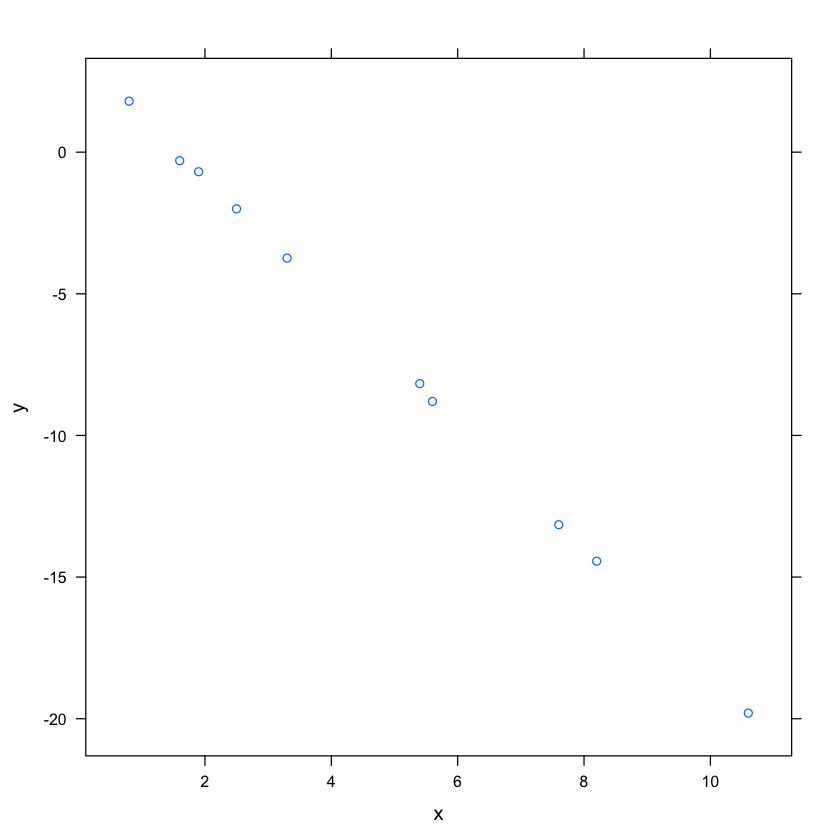

In [38]:
xyplot(y ~ x, data=two)

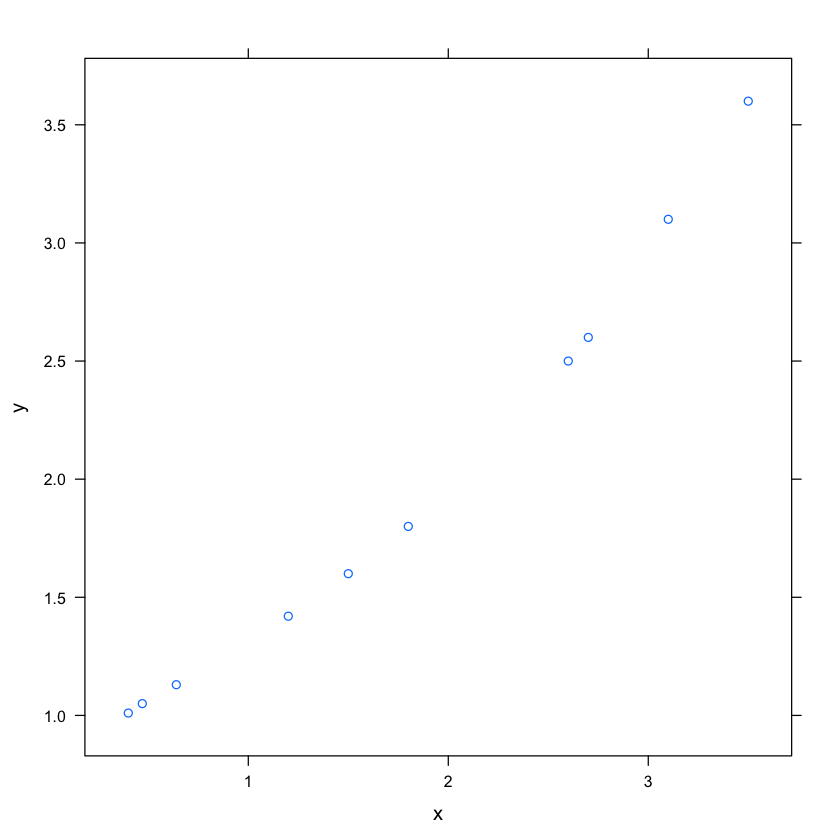

In [39]:
xyplot(y ~ x, data=three)

### ii. $\log y$ vs. $\log x$

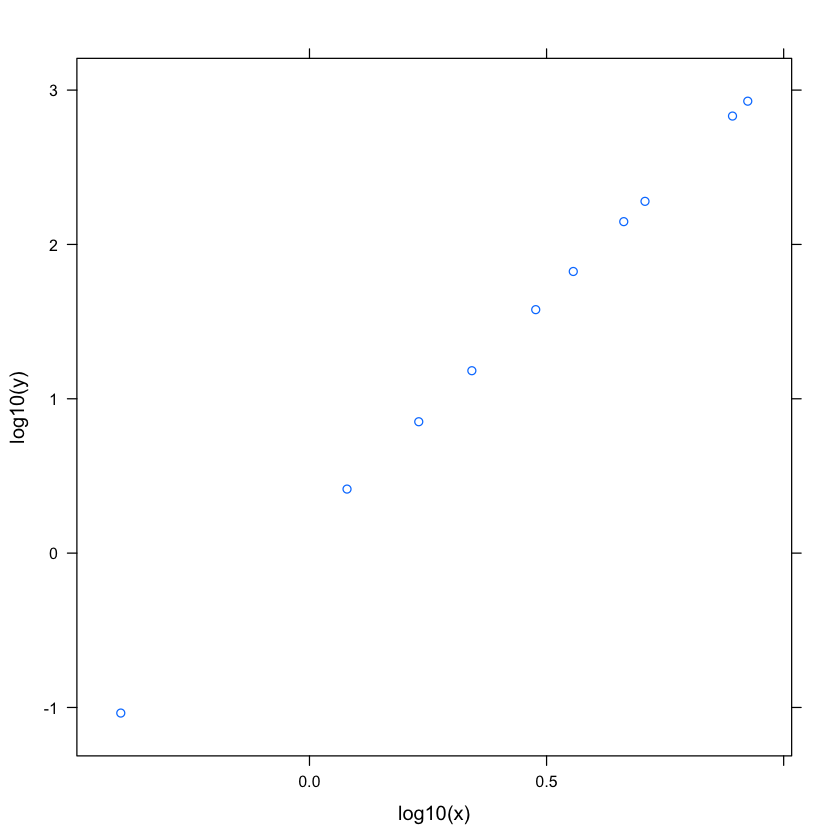

In [40]:
xyplot(log10(y) ~ log10(x), data=one)

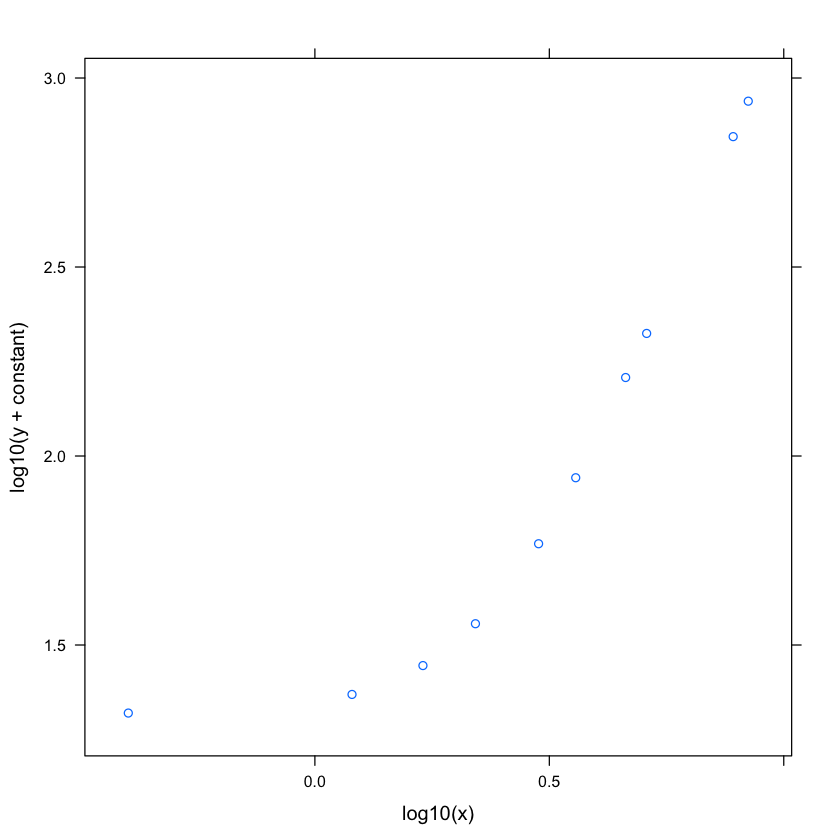

In [41]:
# You cannot take logs of negative y-values.
# In order to linearize, a constant must be added
# to transform the data.
constant <- -with(two, min(y)) + 1
xyplot(log10(y + constant) ~ log10(x), data=one)

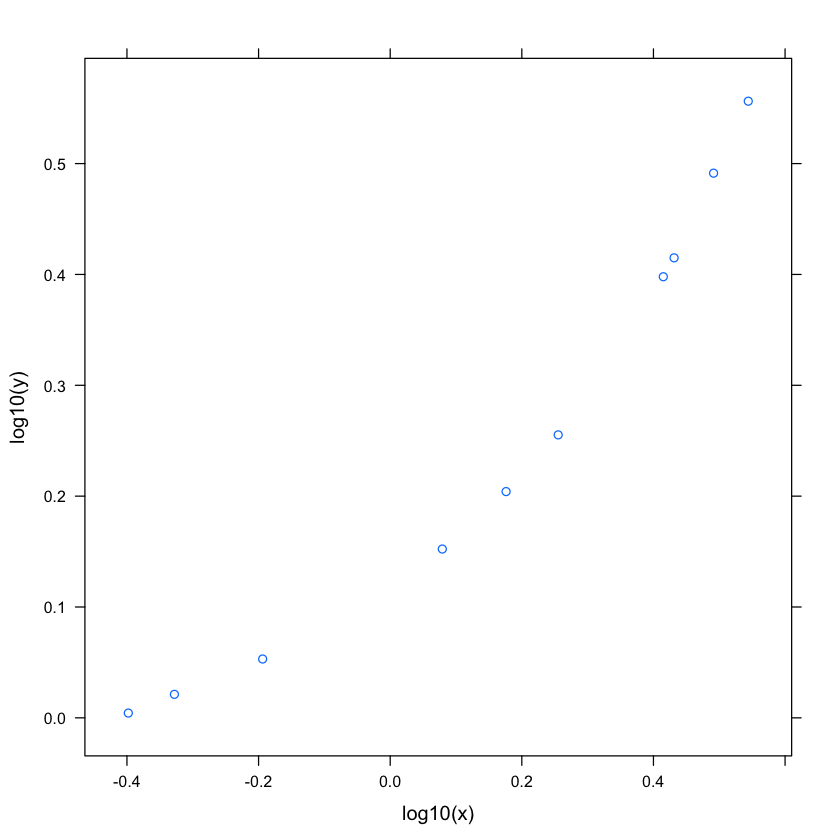

In [42]:
xyplot(log10(y) ~ log10(x), data=three)

### iii. $\log y$ vs. $x$

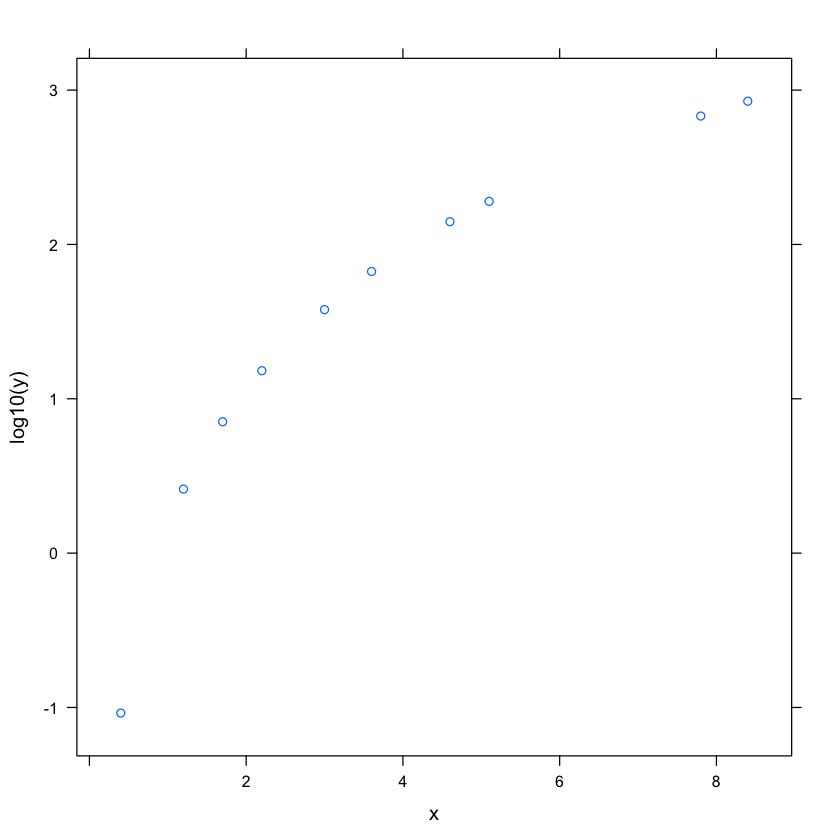

In [43]:
xyplot(log10(y) ~ x, data=one)

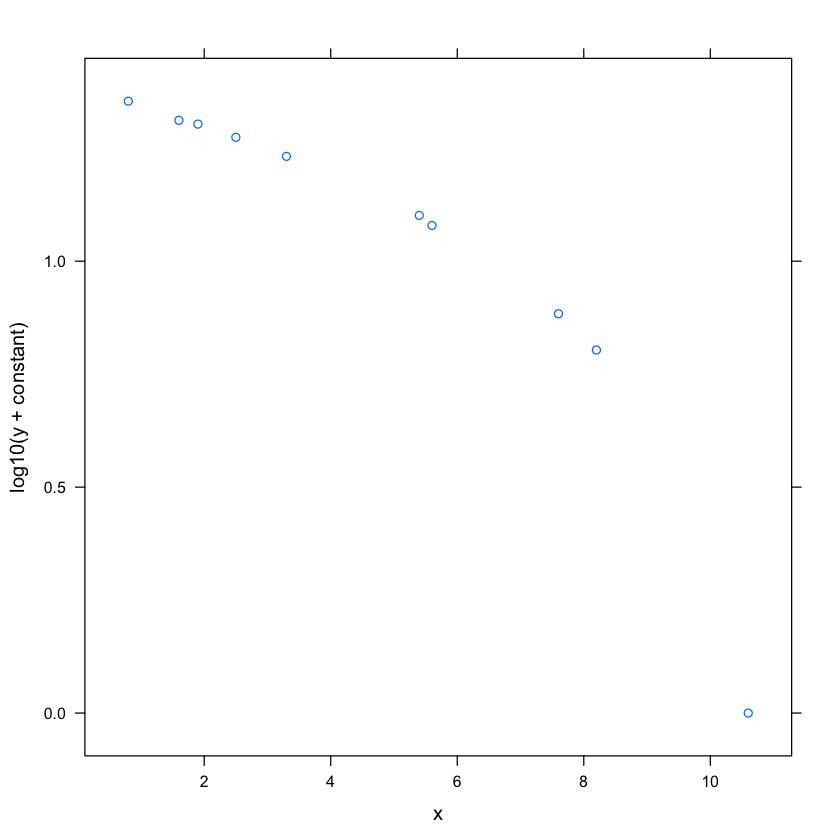

In [44]:
xyplot(log10(y + constant) ~ x, data=two)

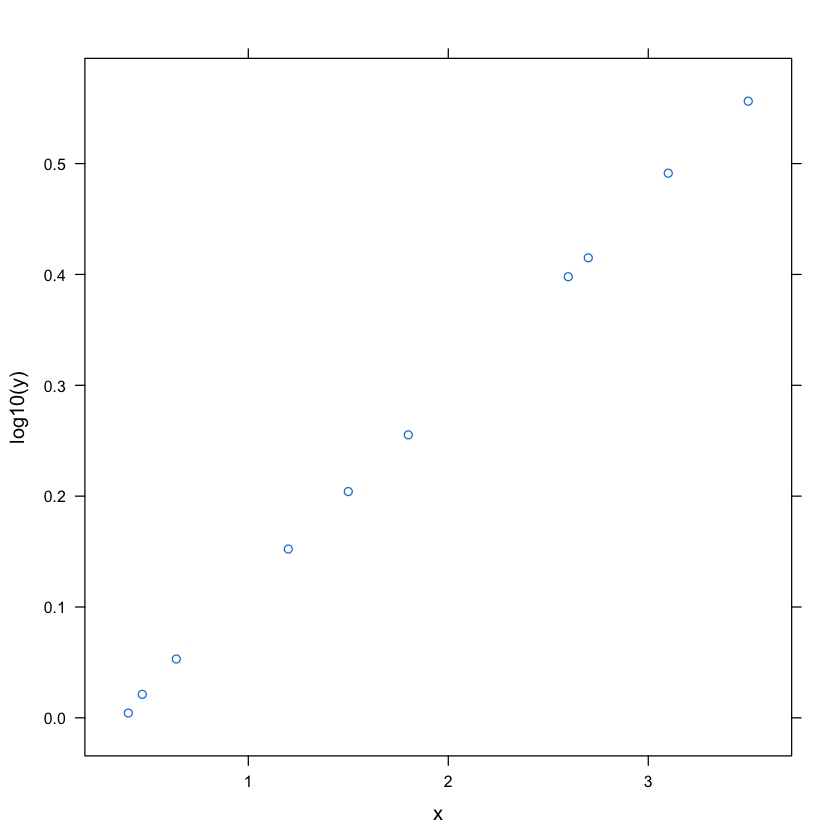

In [45]:
xyplot(log10(y) ~ x, data=three)

## b.

### i. $r$ and $r^2$

1) The $\log y$ vs. $\log x$ plot is most linear.

In [46]:
r <- with(one, cor(log10(y), log10(x)))
r.2 <- r^2
paste("r: ", r)
paste("r^2:", r.2)

[1] "r:  0.999981339487814"

[1] "r^2: 0.999962679323843"

2) The $x$ vs. $y$ plot is most linear.

In [47]:
r <- with(two, cor(y, x))
r.2 <- r^2
paste("r: ", r)
paste("r^2:", r.2)

[1] "r:  -0.999874000169493"

[1] "r^2: 0.999748016214944"

3) The $\log y$ vs. $x$

In [48]:
r <- with(three, cor(log10(y), x))
r.2 <- r^2
paste("r: ", r)
paste("r^2:", r.2)

[1] "r:  0.999931239087891"

[1] "r^2: 0.999862482903845"

### ii. The regression line

In [49]:
# 1.
one.m <- lm(log10(y) ~ log10(x), data=one)
coef(one.m)
epsilon.0 <- coef(one.m)[1]
epsilon.1 <- coef(one.m)[2]
paste("log(y-hat) = ", epsilon.0, " + ", epsilon.1, "log(x)")

(Intercept)    log10(x) 
   0.160868    2.993210

[1] "log(y-hat) =  0.160868025226873  +  2.99320984805306 log(x)"

In [50]:
# 2.
two.m <- lm(y ~ x, data=two)
coef(two.m)
paste("y-hat = ", coef(two.m)[1], " + ", coef(two.m)[2], "x")

(Intercept)           x 
   3.448939   -2.184829

[1] "y-hat =  3.44893903643262  +  -2.18482927082792 x"

In [51]:
# 3.
three.m <- lm(log10(y) ~ x, data=three)
coef(three.m)
epsilon.0 <- coef(three.m)[1]
epsilon.1 <- coef(three.m)[2]
paste("log(y-hat) = ", epsilon.0, " + ", epsilon.1, "x")

(Intercept)           x 
-0.06282991  0.17750679

[1] "log(y-hat) =  -0.0628299092771425  +  0.177506789083983 x"

### iii. The residuals  -- and plot them

[1]  0.139491590 -1.484040895  0.188175435 -1.111219889 -0.100379311
 [6] -0.978449510 -0.191055913  1.014327288  0.001271739 -0.009938437

1             2             3             4             5 
-0.0039673777  0.0007610614 -0.0012216865  0.0007114333  0.0170992373 
            6             7             8             9            10 
 0.0030350304  0.0004364681 -0.0115002637 -0.0059622450  0.0006083425

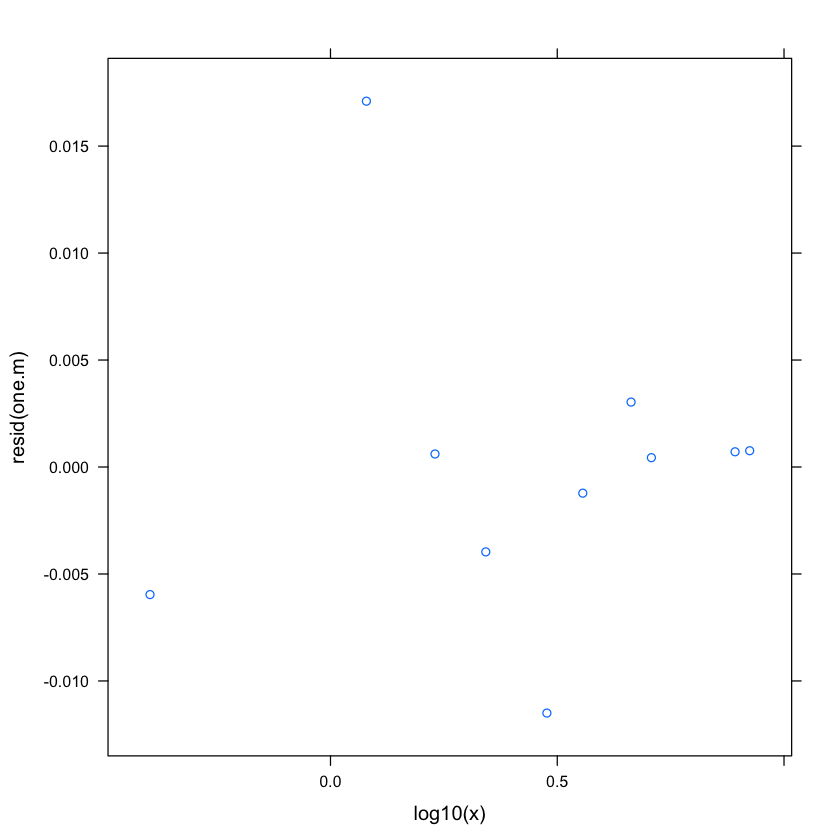

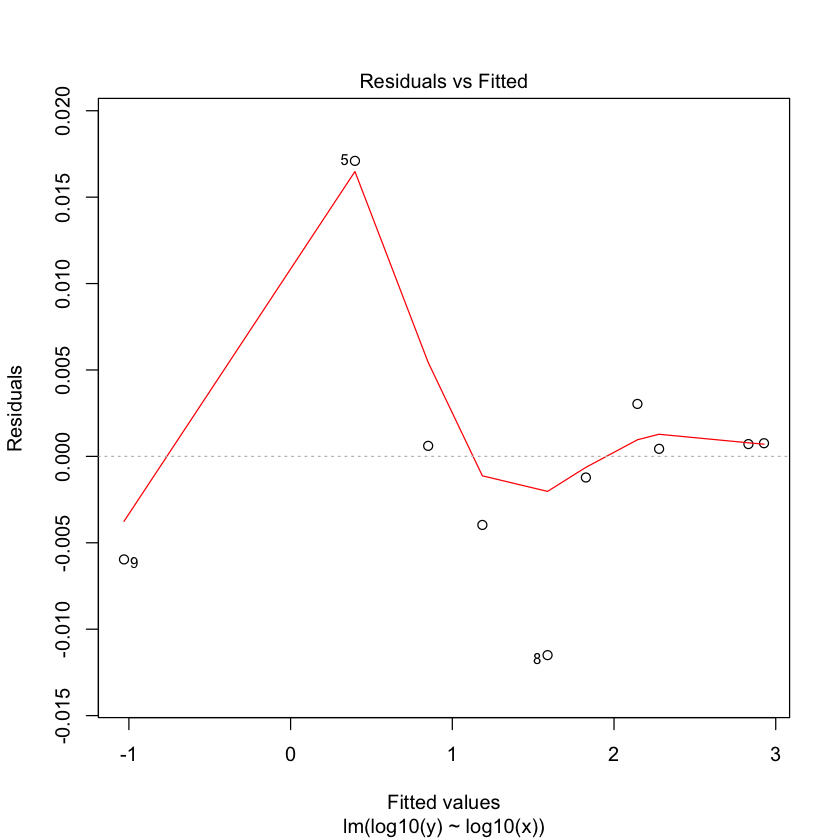

In [58]:
# 1.
one.fun <- makeFun(one.m)
one$resid <- one.fun(one$x) - one$y
one$resid
resid(one.m)
xyplot(resid(one.m) ~ log10(x), data=one)
plot(one.m, which=1)

1            2            3            4            5            6 
-0.253212203  0.013134141  0.005763422 -0.013895120  0.012236578  0.026660984 
           7            8            9           10 
 0.020997557 -0.089748766  0.098924380  0.179139026

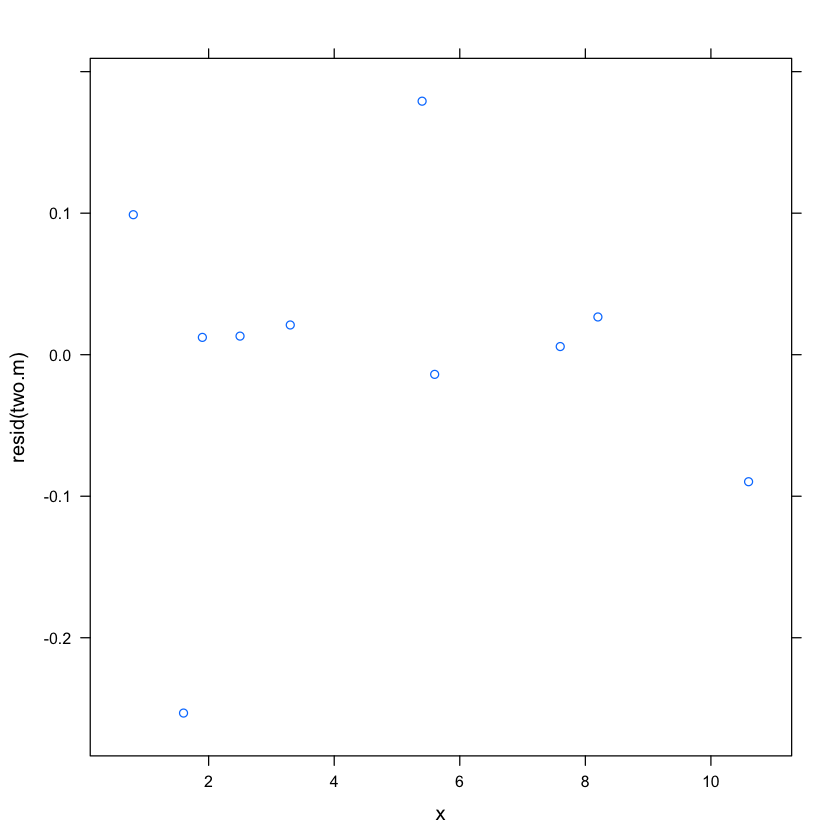

In [53]:
# 2.
resid(two.m)
xyplot(resid(two.m) ~ x, data=two)

NULL

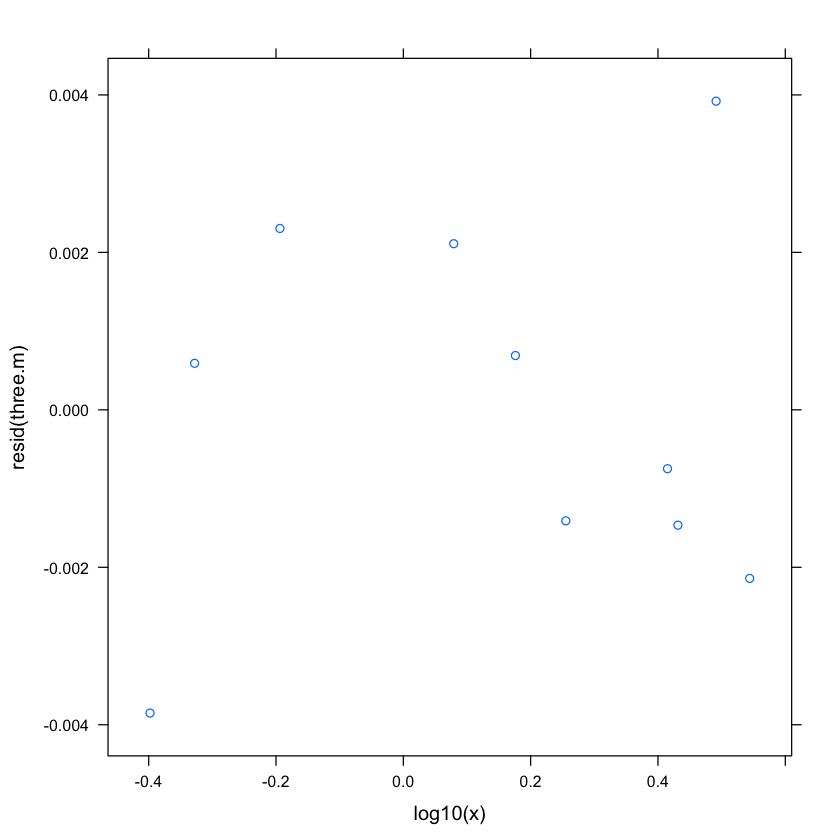

In [33]:
# 3.
resid(three)
xyplot(resid(three.m) ~ log10(x), data=three)

### iv. The equation for $\hat y$ in terms of $x$

In [23]:
# 1.
epsilon.0 <- coef(one.m)[1]
epsilon.1 <- coef(one.m)[2]
paste("y-hat = ", 10^epsilon.0, "x^", epsilon.1)

[1] "y-hat =  1.44833166308377 x^ 2.99320984805306"

In [24]:
# 2.
paste("y-hat = ", coef(two.m)[1], " + ", coef(two.m)[2], "x")

[1] "y-hat =  3.44893903643262  +  -2.18482927082792 x"

In [25]:
# 3.
epsilon.0 <- coef(three.m)[1]
epsilon.1 <- coef(three.m)[2]
paste("y-hat = ", 10^epsilon.0, " • ", 10^epsilon.1, "^x")

[1] "y-hat =  0.865306748391751  •  1.50489704383676 ^x"